In [2]:
!python --version
import tensorflow
tensorflow.__version__

Python 3.6.5


'2.5.0'

In [7]:
!pip install tensorflow

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/Mask Detection System/db'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/Mask Detection System/db\annotations\maksssksksss0.xml
D:/Mask Detection System/db\annotations\maksssksksss1.xml
D:/Mask Detection System/db\annotations\maksssksksss10.xml
D:/Mask Detection System/db\annotations\maksssksksss100.xml
D:/Mask Detection System/db\annotations\maksssksksss101.xml
D:/Mask Detection System/db\annotations\maksssksksss102.xml
D:/Mask Detection System/db\annotations\maksssksksss103.xml
D:/Mask Detection System/db\annotations\maksssksksss104.xml
D:/Mask Detection System/db\annotations\maksssksksss105.xml
D:/Mask Detection System/db\annotations\maksssksksss106.xml
D:/Mask Detection System/db\annotations\maksssksksss107.xml
D:/Mask Detection System/db\annotations\maksssksksss108.xml
D:/Mask Detection System/db\annotations\maksssksksss109.xml
D:/Mask Detection System/db\annotations\maksssksksss11.xml
D:/Mask Detection System/db\annotations\maksssksksss110.xml
D:/Mask Detection System/db\annotations\maksssksksss111.xml
D:/Mask Detection System/db\annotations\maksss

In [9]:
#import the libraries
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import random as rand

In [10]:
# Defiine functions that performs task 1 mentioned above

#This function will get the coordinates of face given in the annotations file
# the coordinates of lower left corner and upper right corner
def generate_box(obj):  
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]
#This function will give label assciated with each label and convert them to numbers
def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0
#Using in this main function we parse the annotations file and get the objects out from them
# Also we use the above two functions here 
def generate_target(image_id, file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, 'xml')
        objects = soup.find_all('object')

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
            
        boxes=np.array(boxes)
        labels=np.array(labels)

        img_id = np.array(image_id)
    # Annotation is in dictionary format
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return (target,num_objs)

In [11]:
imgs = list(sorted(os.listdir("D:/Mask Detection System/db/images/")))
len(imgs)

853

In [12]:
labels = list(sorted(os.listdir("D:/Mask Detection System/db/annotations/")))
len(labels)

853

In [13]:
# Here we use the above functions and save results in lists
targets=[]#store coordinates
numobjs=[]#stores number of faces in each image
#run the loop for number of images we have
for i in range(853):
    file_image = 'maksssksksss'+ str(i) + '.png'
    file_label = 'maksssksksss'+ str(i) + '.xml'
    img_path = os.path.join("D:/Mask Detection System/db/images/", file_image)
    label_path = os.path.join("D:/Mask Detection System/db/annotations/", file_label)
    #Generate Label
    target,numobj = generate_target(i, label_path)
    targets.append(target)
    numobjs.append(numobj)

In [14]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
face_images=[]
face_labels=[]
for i in range(853):
    img_path = r"D:/Mask Detection System/db/images/maksssksksss{}.png".format(i)
    #read image
    img = cv2.imread(img_path)
    for j in range(numobjs[i]):
#       get coordinates of ith image in list 
        locs=(targets[i]['boxes'][j])
#     Get the face from the image using the coordinates
#the arguments are as ymin , ymax and xmin xmax
        img1=img[locs[1]:locs[3],locs[0]:locs[2]]
        img1 = cv2.resize(img1, (224, 224))
        img1 = img_to_array(img1)
        img1 = preprocess_input(img1)
        face_images.append(img1)
        face_labels.append(targets[i]['labels'][j])

face_images= np.array(face_images, dtype="float32")
face_labels = np.array(face_labels)

In [15]:
len(face_labels)

4072

In [16]:
unique, counts = np.unique(face_labels, return_counts=True)
dict(zip(unique, counts))

{0: 717, 1: 3232, 2: 123}

In [17]:
#Encode the labels in one hot encode form
lb = LabelEncoder()
labels = lb.fit_transform(face_labels)
labels = to_categorical(labels)
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
#Perform data augmentation.
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [19]:
#define the model
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_shape=(224, 224, 3))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.25)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [20]:
#define the hyperparamets for traing te neural network
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [21]:
#divide data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(face_images, labels,
	test_size=0.2, stratify=labels, random_state=42)

In [22]:
#Free some space.I did this tep as the notebook was running out of space while training
del targets,face_images,face_labels

In [23]:
#Complie the model and train it
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
class_weight = {0:5 , 1:1, 2:10}) #Here we sets weights to each class. 
#Class having high weight will be considered more importat while training

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
101/101 [==============================] - 93s 848ms/step - loss: 1.7344 - accuracy: 0.6825 - val_loss: 0.6965 - val_accuracy: 0.6859
Epoch 2/20
101/101 [==============================] - 81s 806ms/step - loss: 1.2973 - accuracy: 0.7743 - val_loss: 0.5535 - val_accuracy: 0.7436
Epoch 3/20
101/101 [==============================] - 81s 798ms/step - loss: 1.1199 - accuracy: 0.8146 - val_loss: 0.4757 - val_accuracy: 0.7975
Epoch 4/20
101/101 [==============================] - 80s 795ms/step - loss: 1.0417 - accuracy: 0.8316 - val_loss: 0.4125 - val_accuracy: 0.8331
Epoch 5/20
101/101 [==============================] - 81s 803ms/step - loss: 0.9347 - accuracy: 0.8478 - val_loss: 0.4501 - val_accuracy: 0.8196
Epoch 6/20
101/101 [==============================] - 81s 799ms/step - loss: 0.9403 - accuracy: 0.8474 - val_loss: 0.3401 - val_accuracy:

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.64      0.95      0.76       143
           1       0.97      0.86      0.91       647
           2       0.38      0.48      0.42        25

    accuracy                           0.86       815
   macro avg       0.66      0.76      0.70       815
weighted avg       0.90      0.86      0.87       815



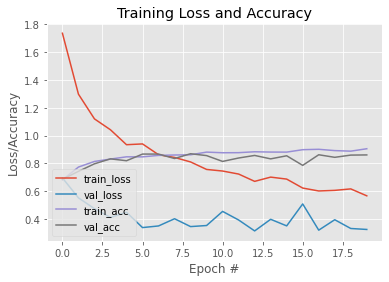

In [24]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# # serialize the model to disk
# print("[INFO] saving mask detector model...")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [25]:
#save the model and name it as you wish.
model.save('New_Trained_MaskZ1.h5')

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [26]:
#train the saved model again 
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
class_weight = {0:5 , 1:1, 2:10})

[INFO] compiling model...
[INFO] training head...


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
101/101 [==============================] - 84s 805ms/step - loss: 0.5777 - accuracy: 0.8992 - val_loss: 0.3327 - val_accuracy: 0.8577
Epoch 2/20
101/101 [==============================] - 81s 800ms/step - loss: 0.5769 - accuracy: 0.9008 - val_loss: 0.3485 - val_accuracy: 0.8540
Epoch 3/20
101/101 [==============================] - 81s 802ms/step - loss: 0.5538 - accuracy: 0.9014 - val_loss: 0.2586 - val_accuracy: 0.8933
Epoch 4/20
101/101 [==============================] - 81s 800ms/step - loss: 0.5717 - accuracy: 0.8998 - val_loss: 0.3156 - val_accuracy: 0.8650
Epoch 5/20
101/101 [==============================] - 81s 801ms/step - loss: 0.5485 - accuracy: 0.9060 - val_loss: 0.2800 - val_accuracy: 0.8871
Epoch 6/20
101/101 [==============================] - 80s 795ms/step - loss: 0.5668 - accuracy: 0.9048 - val_loss: 0.3259 - val_accuracy: 0.8650
Epoch 7/20
101/101 [==============================] - 81s 799ms/step - loss: 0.5020 - accuracy: 0.9088 - val_loss: 0.2856 - val_ac

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       143
           1       0.97      0.90      0.94       647
           2       0.40      0.56      0.47        25

    accuracy                           0.89       815
   macro avg       0.70      0.79      0.74       815
weighted avg       0.91      0.89      0.90       815



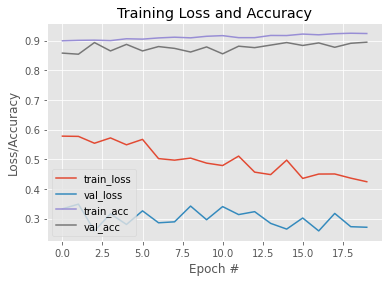

In [27]:
#Evaluate the model again
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# # serialize the model to disk
# print("[INFO] saving mask detector model...")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()